In [240]:
import numpy as np
import expansionCapacity_makeData as mk
import gurobipy as gp
import matplotlib.pyplot as plt
import itertools 

In [254]:
I=1
J=3
dd,iPos, jPos = mk.makeData(I,J)
c = 10.0+np.arange(I)
demand = [80,100,120]
prob = [0.25,0.5,0.25]
def Q(x,scenario,I,J,c,dd):
    gp.setParam('LogToConsole', 0)
    m = gp.Model()
    y = m.addVars(I,J,lb=0,name='y')
    s = m.addVars(J, lb=0, name='s')
    con = m.addConstrs( y.sum(i,'*') <= x[i] for i in range(I))
    m.addConstrs( y.sum('*',j) + s[j] >= scenario[j] for j in range(J))
    obj = gp.quicksum(y[i,j]*dd[i,j] for i in range(I) for j in range(J)) + 100*s.sum('*')
    m.setObjective(obj, sense=gp.GRB.MINIMIZE)
    m.optimize()

    return obj.getValue(), np.array([con[i].Pi for i in range(I)])

In [255]:
def fg1(x,I,J,c,dd,demand,prob):
    #print(x)
    fval = np.dot(c,x)
    grad = np.array(c)
    for scenario, probs in zip(itertools.product(*(J*[demand])),itertools.product(*(J*[prob]))):
        v, s = Q(x,scenario,I,J,c,dd)
        pp = np.array(probs).prod()
        fval += pp*v
        grad[:] +=  pp*s
    return fval, grad
    


    
    
    

In [256]:
I=1
J=3
dd,iPos, jPos = mk.makeData(I,J)
c = 10.0+np.arange(I)
demand = [80,100,120]
prob = [0.25,0.5,0.25]
fg = lambda x:fg1(x,I,J,c,dd, demand,prob)
xx = np.linspace(100,800,1000)
yy = [fg(np.array([x]))[0] for x in xx]
gg = [fg(np.array([x]))[1] for x in xx]

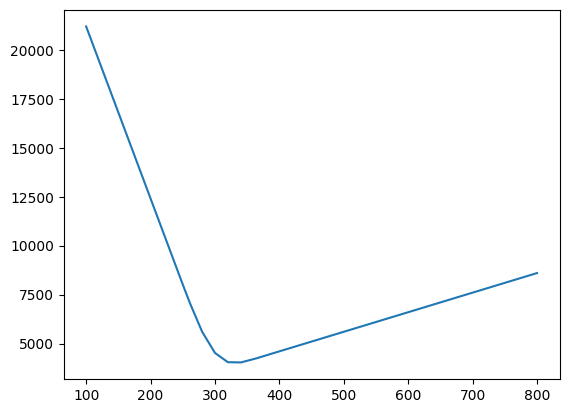

In [257]:
plt.plot(xx,yy)

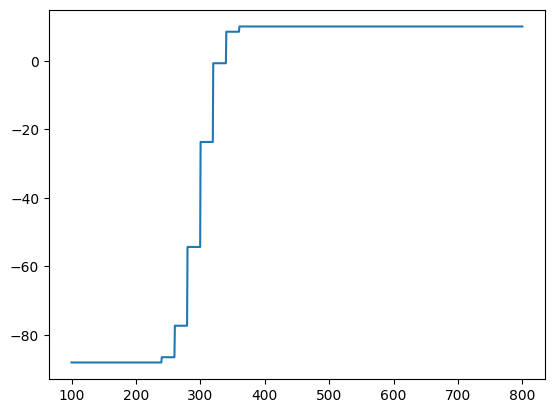

In [258]:


plt.plot(xx,gg)

In [259]:
import pynso.cuttingPlane as cp

In [260]:
x0 = np.array([10])
res = cp.minimize(x0,fg=fg)

Currently loaded models:
_21 : <gurobi.Model Continuous instance Unnamed: 0 constrs, 0 vars, Parameter changes: Username=(user-defined), LogToConsole=0>
_23 : <gurobi.Model Continuous instance Unnamed: 3 constrs, 20 vars, Parameter changes: Username=(user-defined), LogToConsole=0>
None
disposing


In [261]:
res

fval = 4030.6250000000005
nIter = 5
status = 0
time = 0.08273696899414062
optimalityMeasure = 0.0

In [262]:
res.x

array([340.])

In [263]:
fg(res.x)

Set parameter Username

--------------------------------------------
--------------------------------------------

Academic license - for non-commercial use only - expires 2025-06-11


(4030.6250000000005, array([8.46875]))

In [264]:
xx = np.linspace(335,345,1000)
yy = [fg(np.array([x]))[0] for x in xx]
gg = [fg(np.array([x]))[1] for x in xx]

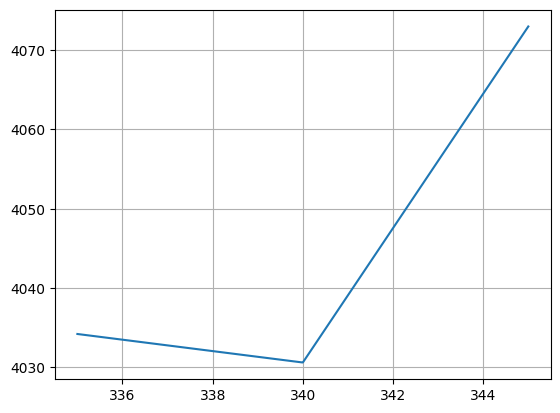

In [265]:
plt.plot(xx,yy)
plt.grid()

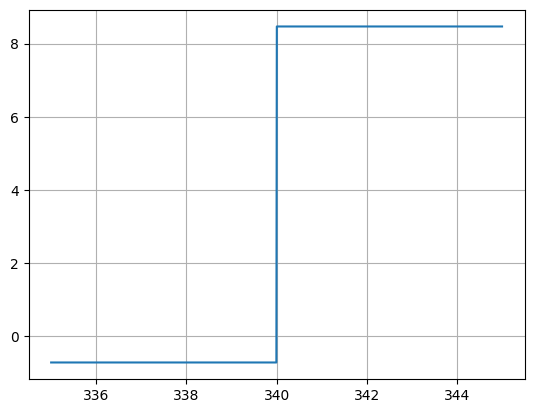

In [266]:
plt.plot(xx,gg)
plt.grid()

In [267]:
import pynso.proxBundle as pb

In [268]:
x0 = np.array([10])
res = pb.minimize(x0,fg=fg,maxIter= 50,tol=1e-8)

In [269]:
res

fval = 4030.624999999987
nIter = 26
status = 0
time = 0.3097810745239258
optimalityMeasure = 8.803261237889662e-11

In [270]:
res.x

array([340.])

### Case 2

In [271]:
I=2
J=3
dd,iPos, jPos = mk.makeData(I,J)
c = 1.0+np.arange(I)
demand = [80,100,120]
prob = [0.25,0.5,0.25]
fg = lambda x:fg1(x,I,J,c,dd, demand,prob)

In [272]:
x0 = np.array([50,100])
res = cp.minimize(x0,fg=fg,lb=0)

Currently loaded models:
_21 : <gurobi.Model Continuous instance Unnamed: 0 constrs, 0 vars, Parameter changes: Username=(user-defined), LogToConsole=0>
_23 : <gurobi.Model Continuous instance Unnamed: 3 constrs, 20 vars, Parameter changes: Username=(user-defined), LogToConsole=0>
None
disposing


In [273]:
res

fval = 1294.0
nIter = 7
status = 0
time = 0.10065388679504395
optimalityMeasure = -2.2737367544323206e-13

In [274]:
res.x

array([360.,   0.])

In [275]:
x0 = np.array([50,100])
res = pb.minimize(x0,fg=fg,lb=0,maxIter=500, tol=1e-10, bundleMaxSize=30)

Set parameter Username

--------------------------------------------
--------------------------------------------

Academic license - for non-commercial use only - expires 2025-06-11


In [277]:
res

fval = 1293.9999999959723
nIter = 277
status = 0
time = 43.68373513221741
optimalityMeasure = 8.58596181341894e-10

In [278]:
res.x

array([280.1132886,  79.8867114])

#### Case 3

In [280]:
I=5
J=10
dd,iPos, jPos = mk.makeData(I,J)
c = 1.0+np.arange(I)
demand = [80,100,120]
prob = [0.25,0.5,0.25]
fg = lambda x:fg1(x,I,J,c,dd, demand,prob)

In [281]:
x0 = np.array([50,100,3,56,7])
res = cp.minimize(x0,fg=fg,lb=0)

Currently loaded models:
_21 : <gurobi.Model Continuous instance Unnamed: 0 constrs, 0 vars, Parameter changes: Username=(user-defined), LogToConsole=0>
_23 : <gurobi.Model Continuous instance Unnamed: 3 constrs, 20 vars, Parameter changes: Username=(user-defined), LogToConsole=0>
None
disposing


In [282]:
res

fval = 8142.170880125672
nIter = 19
status = 0
time = 735.6973640918732
optimalityMeasure = -1.2960299500264227e-09

In [283]:
res.x

array([360.,   0.,   0., 320., 420.])

In [285]:
iPos

array([[ 0.  ,  0.31, -1.62, -2.43,  1.24],
       [ 0.  ,  0.95,  1.18, -1.76, -3.8 ]])

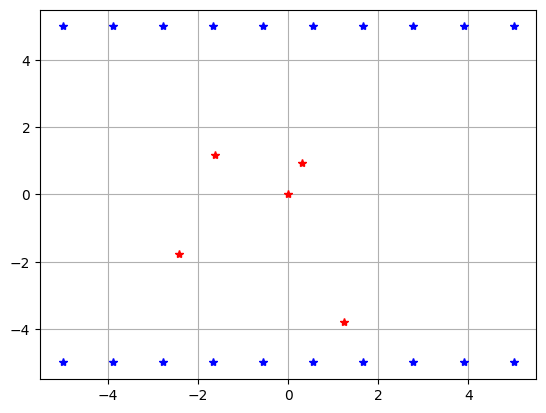

In [287]:
plt.plot(*iPos, '*r')
plt.plot(*jPos, '*b')
plt.grid()

In [288]:
c

array([1., 2., 3., 4., 5.])

295245